Menginstal & mengimpor library Pandas

In [97]:
import pandas as pd

Membaca file .csv

In [98]:
movies = pd.read_csv("NetflixOriginals.csv", encoding="latin1")

C:\Users\ASUS\AppData\Local\Temp\ipykernel_2112\2051469381.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='IMDB Score', y='Title', data=top_movies, palette=netflix_palette)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_2112\2051469381.py:19: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.barplot(x='IMDB Score', y='Title', data=top_movies, palette=netflix_palette)


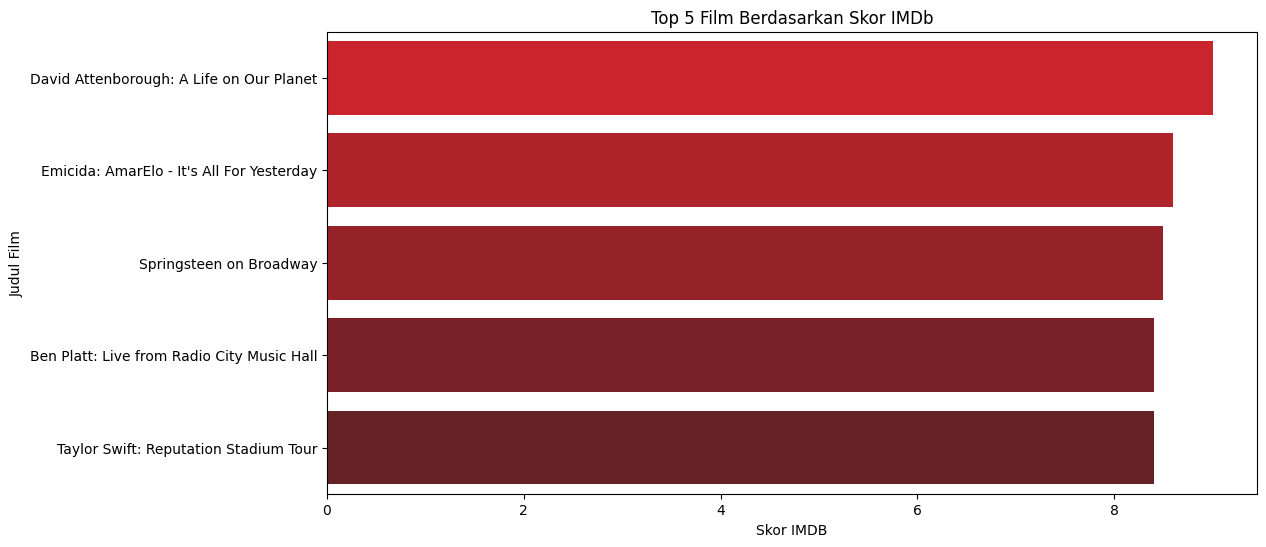

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

# Palet kustom yang sesuai dengan tema warna Netflix
netflix_colors = ["#E50914", "#7D141A", "#39201F", "#221f1f"]  # Gradasi merah ke hitam
netflix_cmap = LinearSegmentedColormap.from_list("netflix", netflix_colors, N=256)

# Fungsi untuk mengonversi cmap menjadi daftar warna
def cmap_to_palette(cmap, n_colors):
    return [cmap(i / n_colors) for i in range(n_colors)]

# Menggunakan 10 warna dari palet kustom
netflix_palette = cmap_to_palette(netflix_cmap, 10)

# 9. Top Films Berdasarkan Skor IMDb
top_movies = movies.nlargest(5, 'IMDB Score')
plt.figure(figsize=(12, 6))
sns.barplot(x='IMDB Score', y='Title', data=top_movies, palette=netflix_palette)
plt.title('Top 5 Film Berdasarkan Skor IMDb')
plt.xlabel('Skor IMDB')
plt.ylabel('Judul Film')
plt.show()

Menampilkan beberapa baris pertama dataset

In [100]:
movies.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi


Menampilkan informasi dataset (jumlah baris & kolom, tipe data untuk setiap kolom, dan jumlah nilai non-null di setiap kolom)

In [101]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       584 non-null    object 
 1   Genre       584 non-null    object 
 2   Premiere    584 non-null    object 
 3   Runtime     584 non-null    int64  
 4   IMDB Score  584 non-null    float64
 5   Language    584 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.5+ KB


Menghitung jumlah nilai null setiap kolom

In [102]:
movies.isnull().sum()

Title         0
Genre         0
Premiere      0
Runtime       0
IMDB Score    0
Language      0
dtype: int64

Memperbaiki judul film

In [103]:
movies['Title'] = movies['Title'].replace("American Factory: A Conversation with the Obamas ", "American Factory: A Conversation with the Obamas")
movies['Title'] = movies['Title'].replace("Bigflo & Oil: Hip Hop Frenzy", "Bigflo & Oli: Hip Hop Frenzy")
movies['Title'] = movies['Title'].replace("Canvas ", "Canvas")
movies['Title'] = movies['Title'].replace("Chasing Coral ", "Chasing Coral")
movies['Title'] = movies['Title'].replace("CounterPunch ", "CounterPunch")
movies['Title'] = movies['Title'].replace("Cuba and the Cameraman ", "Cuba and the Cameraman")
movies['Title'] = movies['Title'].replace("Homecoming: A Film by Beyonce ", "Homecoming: A Film by Beyonce")
movies['Title'] = movies['Title'].replace("Jim & Andy: The Great Beyond - Featuring a Very Special, Contractually Obligated Mention of Tony Cliffton ", "Jim & Andy: The Great Beyond - Featuring a Very Special, Contractually Obligated Mention of Tony Cliffton")
movies['Title'] = movies['Title'].replace("Mucho Mucho Amor: The Legend of Walter Mercado ", "Mucho Mucho Amor: The Legend of Walter Mercado")
movies['Title'] = movies['Title'].replace("Rolling Thunder Revue: A bob Dylan Story by Martin Scorsere", "Rolling Thunder Revue: A bob Dylan Story by Martin Scorsese")
movies['Title'] = movies['Title'].replace("Voyuer ", "Voyuer")
movies['Title'] = movies['Title'].replace("Zion ", "Zion")
movies['Title'] = movies['Title'].replace("Òlòt?ré", "Òlòtūré")

Mengubah nama kolom "IMDB Score" menjadi "Score"

In [104]:
movies.rename(columns={'IMDB Score' : 'Score'}, inplace=True)

Mengganti semua kata "romantic" pada kolom "Genre" dengan kata "romance"

In [105]:
movies['Genre'] = movies['Genre'].str.replace('romantic', 'romance')

Membuat kolom "Genre + Language" yang merupakan gabungan dari kolom "Genre" dan "Language"

In [106]:
movies['Genre + Language'] = movies['Genre'] + "/" + movies['Language']
movies

,Title,Genre,Premiere,Runtime,Score,Language,Genre + Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese,Documentary/English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish,Thriller/Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian,Science fiction/Drama/Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English,Horror thriller/English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi,Mystery/Hindi
...,...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English,Concert Film/English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian,Documentary/English/Ukranian/Russian
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English,One-man show/English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese,Documentary/Portuguese


Mengimpor beberapa library:
1. "CountVectorizer" untuk mengonversi teks menjadi representasi vektor
2. "cosine_similarity" untuk menghitung nilai kesamaan antar vektor
3. "numpy" & "scipy.sparse" untuk melakukan operasi numerik dan representasi matriks

In [107]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import scipy.sparse as sp

Mendefinisikan fungsi "custom_tokenizer" untuk "CountVectorizer", menggantikan tanda "/" dan "-" dengan spasi, lalu membagi teks menjadi token-token terpisah

In [108]:
def custom_tokenizer(text):
    return text.replace("/", "").replace("-", "").split()

Mengonversi teks dalam kolom "Genre + Language" menjadi representasi numerik

In [109]:
genre_language_vectorizer = CountVectorizer(tokenizer=custom_tokenizer)
genre_language_matrix = genre_language_vectorizer.fit_transform(movies['Genre + Language'])

C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Mengonversi teks dalam kolom "Genre" menjadi representasi numerik

In [110]:
genre_vectorizer = CountVectorizer(tokenizer=custom_tokenizer)
genre_matrix = genre_vectorizer.fit_transform(movies['Genre'])

Menggabungkan dua matriks representasi numerik dari kolom 'Genre + Language' dan 'Genre' menjadi satu matriks gabungan

In [111]:
combined_matrix = sp.hstack([genre_language_matrix, genre_matrix])

Menghitung matriks kesamaan, di mana setiap entri mewakili skor kesamaan antara dua film

In [112]:
similarity_matrix = cosine_similarity(combined_matrix)
similarity_matrix

array([[1. , 0. , 0. , ..., 0. , 0.5, 0.5],
       [0. , 1. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 1. , ..., 0. , 0. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 1. , 0. , 0. ],
       [0.5, 0. , 0. , ..., 0. , 1. , 0.5],
       [0.5, 0. , 0. , ..., 0. , 0.5, 1. ]])

Memilih judul film (yang akan diminta rekomendasinya) untuk mendapatkan indeksnya

In [113]:
film_req = movies[movies['Title']=='The Irishman'].index[0]
film_req

561

Mengurutkan daftar rekomendasi berdasarkan skor kesamaan dan skor IMDB yang didapat dari kolom "Score"

In [114]:
recommendations = sorted(list(enumerate(similarity_matrix[film_req])), reverse=True, key=lambda vector: (vector[1], movies.iloc[vector[0]]['Score']))
recommendations = [(idx, score) for idx, score in recommendations if idx != film_req]
recommendations

[(500, 1.0),
 (429, 1.0),
 (230, 1.0),
 (116, 1.0),
 (508, 0.75),
 (491, 0.75),
 (461, 0.75),
 (361, 0.75),
 (287, 0.75),
 (233, 0.75),
 (565, 0.7071067811865475),
 (562, 0.7071067811865475),
 (549, 0.7071067811865475),
 (488, 0.7071067811865475),
 (454, 0.7071067811865475),
 (470, 0.7071067811865475),
 (475, 0.7071067811865475),
 (477, 0.7071067811865475),
 (438, 0.7071067811865475),
 (418, 0.7071067811865475),
 (389, 0.7071067811865475),
 (406, 0.7071067811865475),
 (409, 0.7071067811865475),
 (411, 0.7071067811865475),
 (369, 0.7071067811865475),
 (374, 0.7071067811865475),
 (376, 0.7071067811865475),
 (381, 0.7071067811865475),
 (322, 0.7071067811865475),
 (336, 0.7071067811865475),
 (299, 0.7071067811865475),
 (317, 0.7071067811865475),
 (269, 0.7071067811865475),
 (291, 0.7071067811865475),
 (247, 0.7071067811865475),
 (258, 0.7071067811865475),
 (222, 0.7071067811865475),
 (224, 0.7071067811865475),
 (211, 0.7071067811865475),
 (191, 0.7071067811865475),
 (198, 0.707106781186547

Menampilkan 5 rekomendasi film terbaik

In [115]:
for i in recommendations[0:5]:
    similarity_score = i[1]
    film_index = i[0]
    if similarity_score > 0:
        print(movies.iloc[film_index].Title)

El Camino: A Breaking Bad Movie
The Highwaymen
Lost Girls
Òlòtūré
On My Skin


Menampilkan data lengkap dari semua film yang direkomendasikan

In [116]:
recommendations = sorted(list(enumerate(similarity_matrix[film_req])), reverse=True, key=lambda vector: (vector[1], movies.iloc[vector[0]]['Score']))
recommendation_count = 1  # Penomoran dimulai dari 1
for film_index, similarity_score in recommendations:
    if similarity_score > 0 and film_index != film_req:
        title = movies.iloc[film_index]['Title']
        imdb_score = movies.iloc[film_index]['Score']
        genre = movies.iloc[film_index]['Genre']
        print(f"{recommendation_count}.Title: {title}, Similarity Score: {similarity_score}, Genre: {genre} , IMDb Score: {imdb_score}")
        recommendation_count += 1

1.Title: El Camino: A Breaking Bad Movie, Similarity Score: 1.0, Genre: Crime drama , IMDb Score: 7.3
2.Title: The Highwaymen, Similarity Score: 1.0, Genre: Crime drama , IMDb Score: 6.9
3.Title: Lost Girls, Similarity Score: 1.0, Genre: Crime drama , IMDb Score: 6.1
4.Title: Òlòtūré, Similarity Score: 1.0, Genre: Crime drama , IMDb Score: 5.5
5.Title: On My Skin, Similarity Score: 0.75, Genre: Crime drama , IMDb Score: 7.3
6.Title: Soni, Similarity Score: 0.75, Genre: Crime drama , IMDb Score: 7.2
7.Title: Ferry, Similarity Score: 0.75, Genre: Crime drama , IMDb Score: 7.1
8.Title: The Crimes That Bind, Similarity Score: 0.75, Genre: Crime drama , IMDb Score: 6.6
9.Title: The Outsider, Similarity Score: 0.75, Genre: Crime drama , IMDb Score: 6.3
10.Title: Rogue City, Similarity Score: 0.75, Genre: Crime drama , IMDb Score: 6.1
11.Title: Marriage Story, Similarity Score: 0.7071067811865475, Genre: Drama , IMDb Score: 7.9
12.Title: The Trial of the Chicago 7, Similarity Score: 0.7071067

Membuat fungsi recommend()

In [117]:
def recommend(movie):
    film_req = movies[movies['Title']==movie].index[0]
    recommendations = sorted(list(enumerate(similarity_matrix[film_req])), reverse=True, key=lambda vector: (vector[1], movies.iloc[vector[0]]['Score']))
    recommendations = [(idx, score) for idx, score in recommendations if idx != film_req]
    for i in recommendations[0:5]:
        similarity_score = i[1]
        film_index = i[0]
        if similarity_score > 0:
            print(movies.iloc[film_index].Title)

Memanggil fungsi recommend()

In [118]:
recommend("The Irishman")

El Camino: A Breaking Bad Movie
The Highwaymen
Lost Girls
Òlòtūré
On My Skin


Mengimpor library Pickle untuk mengubah objek Python menjadi format yang dapat disimpan

In [119]:
import pickle

Menyimpan movies dan similarity_matrix ke dalam file .pkl

In [120]:
pickle.dump(movies, open('movies_list.pkl','wb'))

In [121]:
pickle.dump(similarity_matrix, open('similarity.pkl','wb'))

Memuat data yang telah disimpan dalam file .pkl

In [122]:
pickle.load(open('movies_list.pkl','rb'))

,Title,Genre,Premiere,Runtime,Score,Language,Genre + Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese,Documentary/English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish,Thriller/Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian,Science fiction/Drama/Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English,Horror thriller/English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi,Mystery/Hindi
...,...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English,Concert Film/English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian,Documentary/English/Ukranian/Russian
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English,One-man show/English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese,Documentary/Portuguese


Link Streamlit: https://recommendflix.streamlit.app